Dataset:

Download the current bitcoin prices from [blockchain.com](https://www.blockchain.com/charts/market-price).

In [1]:
import pandas as pd 
import numpy as np
import math

In [23]:
dataset = pd.read_csv(r'C:/Users/Yukawa/datasets/bitcoin/market-price_all.csv')
dataset.tail(10)

,Timestamp,market-price
1387,2020-05-26 00:00:00,8899.66
1388,2020-05-29 00:00:00,9569.21
1389,2020-06-01 00:00:00,9450.84
1390,2020-06-04 00:00:00,9658.04
1391,2020-06-07 00:00:00,9670.43
1392,2020-06-10 00:00:00,9775.15
1393,2020-06-13 00:00:00,9459.97
1394,2020-06-16 00:00:00,9426.70
1395,2020-06-19 00:00:00,9380.03
1396,2020-06-22 00:00:00,9284.78


In [24]:
dataset.tail(20)

,Timestamp,market-price
1377,2020-04-26 00:00:00,7549.52
1378,2020-04-29 00:00:00,7765.33
1379,2020-05-02 00:00:00,8824.66
1380,2020-05-05 00:00:00,8885.93
1381,2020-05-08 00:00:00,10002.48
1382,2020-05-11 00:00:00,8754.46
1383,2020-05-14 00:00:00,9305.93
1384,2020-05-17 00:00:00,9385.70
1385,2020-05-20 00:00:00,9785.74
1386,2020-05-23 00:00:00,9167.26


In [3]:
def get_timebin(index, size):
    timebin = dataset[index:(index + size)]
    timebin_mean = timebin['market-price'].mean()
    
    result_timebin = timebin.copy(deep=True)
    result_timebin['normalized-market-price'] = timebin['market-price'] - timebin['market-price'].mean()
    result_timebin['distance_to_timebin_mean_in_percent'] = (result_timebin['normalized-market-price'] / result_timebin['market-price'].mean()) * 100
    result_timebin.reset_index(drop=True, inplace=True)
    return result_timebin

In [4]:
def find_euclidean_dist(timebin_x, timebin_y):
    euclidian_distance = pd.DataFrame({
                        'first': timebin_x['distance_to_timebin_mean_in_percent'],
                        'second': timebin_y['distance_to_timebin_mean_in_percent']
                        })
    return math.sqrt(((euclidian_distance['first'] - euclidian_distance['second']) ** 2).sum())

In [5]:
x = get_timebin(450,10)
x

,Timestamp,market-price,normalized-market-price,distance_to_timebin_mean_in_percent
0,2012-09-14 00:00:00,11.48,-0.878,-7.104709
1,2012-09-17 00:00:00,11.98,-0.378,-3.058747
2,2012-09-20 00:00:00,12.63,0.272,2.201003
3,2012-09-23 00:00:00,12.40,0.042,0.339861
4,2012-09-26 00:00:00,12.24,-0.118,-0.954847
5,2012-09-29 00:00:00,12.46,0.102,0.825376
6,2012-10-02 00:00:00,12.58,0.222,1.796407
7,2012-10-05 00:00:00,13.07,0.712,5.761450
8,2012-10-08 00:00:00,12.58,0.222,1.796407
9,2012-10-11 00:00:00,12.16,-0.198,-1.602201


In [6]:
y = get_timebin(1260, 10)
y

,Timestamp,market-price,normalized-market-price,distance_to_timebin_mean_in_percent
0,2019-05-11 00:00:00,6348.02,-1567.981,-19.807741
1,2019-05-14 00:00:00,7823.11,-92.891,-1.173459
2,2019-05-17 00:00:00,7885.96,-30.041,-0.379497
3,2019-05-20 00:00:00,8193.70,277.699,3.508072
4,2019-05-23 00:00:00,7625.93,-290.071,-3.664363
5,2019-05-26 00:00:00,8071.45,155.449,1.963731
6,2019-05-29 00:00:00,8719.88,803.879,10.155115
7,2019-06-01 00:00:00,8553.81,637.809,8.057212
8,2019-06-04 00:00:00,8134.92,218.919,2.765525
9,2019-06-07 00:00:00,7803.23,-112.771,-1.424596


In [7]:
find_euclidean_dist(x,y)

16.32067570516321

In [25]:
1 / 16

0.0625

In [8]:
def get_nearest_neighbours(timebin_i, timebin_size, min_timebin_size=5, max_timebin_size=50):
    timebin = get_timebin(timebin_i, timebin_size)
    
    neighbour_timebins = list()
    
    max_timebin_size += 1 # range ignores last value
    for timebin_size in range(min_timebin_size, max_timebin_size):
        for i in range(0, len(dataset)-timebin_size-1, timebin_size):
            if timebin_i <= i <= (timebin_i+timebin_size):
                continue

            neighbour_timebin = get_timebin(i, timebin_size)
            dist = find_euclidean_dist(timebin, neighbour_timebin)

            if not math.isnan(dist) and dist != 0.0:
                neighbour_timebins.append( (dist, timebin_size, i) )

    df = pd.DataFrame(neighbour_timebins)
    df.columns = ['dist', 'bin_size', 'bin_index']
    df.sort_values(by='dist', inplace=True, ignore_index=True)
    return df

In [9]:
neighbours = get_nearest_neighbours(450, 10)
neighbours

,dist,bin_size,bin_index
0,3.268380,7,420
1,3.867009,6,420
2,4.423080,5,420
3,5.306658,7,945
4,5.377111,5,1005
...,...,...,...
2830,316.399433,36,180
2831,316.399433,26,182
2832,322.135446,12,192
2833,483.753739,8,192


In [26]:
get_timebin(427, 10)

,Timestamp,market-price,normalized-market-price,distance_to_timebin_mean_in_percent
0,2012-07-07 00:00:00,6.74,-1.768,-20.780442
1,2012-07-10 00:00:00,6.98,-1.528,-17.959567
2,2012-07-13 00:00:00,7.46,-1.048,-12.317819
3,2012-07-16 00:00:00,7.80,-0.708,-8.321580
4,2012-07-19 00:00:00,9.37,0.862,10.131641
5,2012-07-22 00:00:00,9.53,1.022,12.012224
6,2012-07-25 00:00:00,8.91,0.402,4.724965
7,2012-07-28 00:00:00,8.95,0.442,5.195110
8,2012-07-31 00:00:00,9.22,0.712,8.368594
9,2012-08-03 00:00:00,10.12,1.612,18.946874


In [10]:
def predict_future_changes(neighbours, n_prediction):
    predictions = np.zeros(n_prediction)
    corr_sum = 0.0
    dataset_len = len(dataset)
    for index, row in neighbours.iterrows():
        corr = 1 / row['dist']
        bin_size = int(row['bin_size'])
        index = int(row['bin_index'])
        
        start_index = index + bin_size
        if (start_index + n_prediction > dataset_len):
            continue
        
        future_bin = get_timebin(start_index, n_prediction)['distance_to_timebin_mean_in_percent'].values.copy()
        future_bin.resize(predictions.shape)  # if future bin has less cells, fill with 0
        future_bin *= corr
        corr_sum += corr
        predictions += future_bin

    return (predictions / corr_sum) / 100

In [11]:
predict_future_changes(get_nearest_neighbours(850, 10), 10)

array([-0.02786642, -0.02254528, -0.01824084, -0.02056334, -0.01136914,
       -0.00551804,  0.00921154,  0.02346687,  0.03054486,  0.0428798 ])

In [12]:
def predict_future_values(timebin_i, timebin_size, n_predictions):
    timebin = get_timebin(timebin_i, timebin_size)
    bin_mean = timebin['market-price'].mean()

    neighbours = get_nearest_neighbours(timebin_i, timebin_size)
    changes = predict_future_changes(neighbours, n_predictions)

    value_changes = changes * bin_mean
    prediction = timebin['market-price'].values + value_changes
    
    out = pd.DataFrame({
    'prediction': prediction,
    'actual': get_timebin(timebin_i+timebin_size, n_predictions)['market-price'].values
    })
    
    return out

In [13]:
result = predict_future_values(600,10, 10)
result

,prediction,actual
0,683.403531,915.69
1,961.146808,826.28
2,869.699604,844.04
3,673.814063,841.83
4,675.755712,811.20
5,609.778834,824.78
6,685.327358,780.02
7,734.086782,747.57
8,757.159178,800.00
9,842.318131,814.34


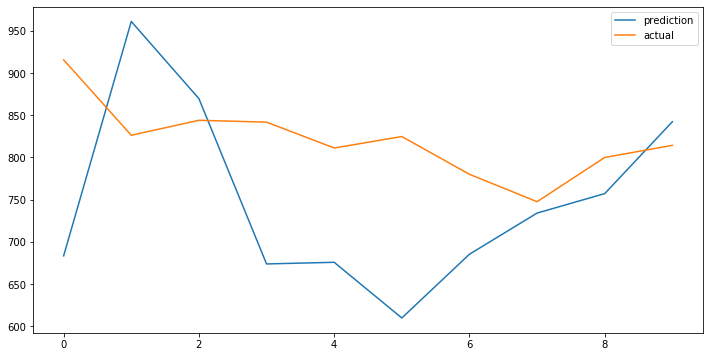

In [14]:
result.plot(figsize=(12,6))

In [15]:
result = predict_future_values(840,30, 30)
result

,prediction,actual
0,314.796523,423.46
1,336.172601,431.89
2,321.280349,422.50
3,345.591356,399.17
4,377.420536,412.15
5,397.936025,420.11
6,429.832843,414.99
7,432.641363,418.49
8,408.737075,411.81
9,428.654983,417.96


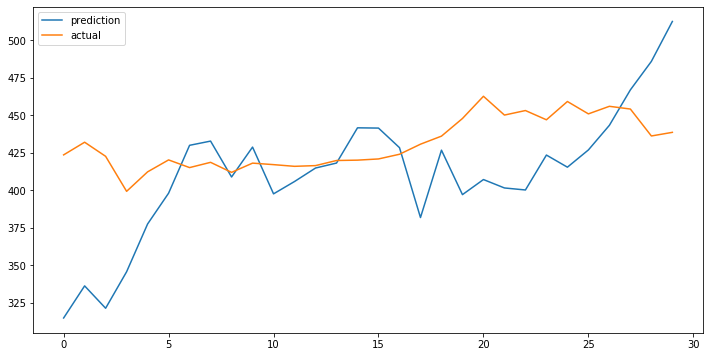

In [16]:
result.plot(figsize=(12,6))

In [17]:
def rmse(predicted_values):
    number_of_predictions = 0
    sum_of_square_differences = 0.0
    for row in predicted_values.itertuples(index=False):
        prediction = row[0]
        actual = row[1]
        
        sum_of_square_differences += (actual - prediction) ** 2
        number_of_predictions += 1
 
    return sum_of_square_differences / number_of_predictions

In [18]:
rmse(result)

2076.6849314153437

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [20]:
r2_score(result['actual'].values, result['prediction'].values)

-6.408025821343902

In [21]:
mean_squared_error(result['actual'].values, result['prediction'].values)

2076.6849314153433